<h1>Sample Collection/Corpus of documents</h1>

We will be implementing TFIDF vectorizer from scratch as well as from sklearn's library and comapare the outputs of both.

In [4]:
# Collection of string documents

corpus = [
     'the cat sat on the tree',
     'the cat and dog are the best friends',
     'there is a scarcity of mango tree and the pug dog',
     'few cat are missing',
]

<h1>TFIDF from Scratch Implementation</h1>

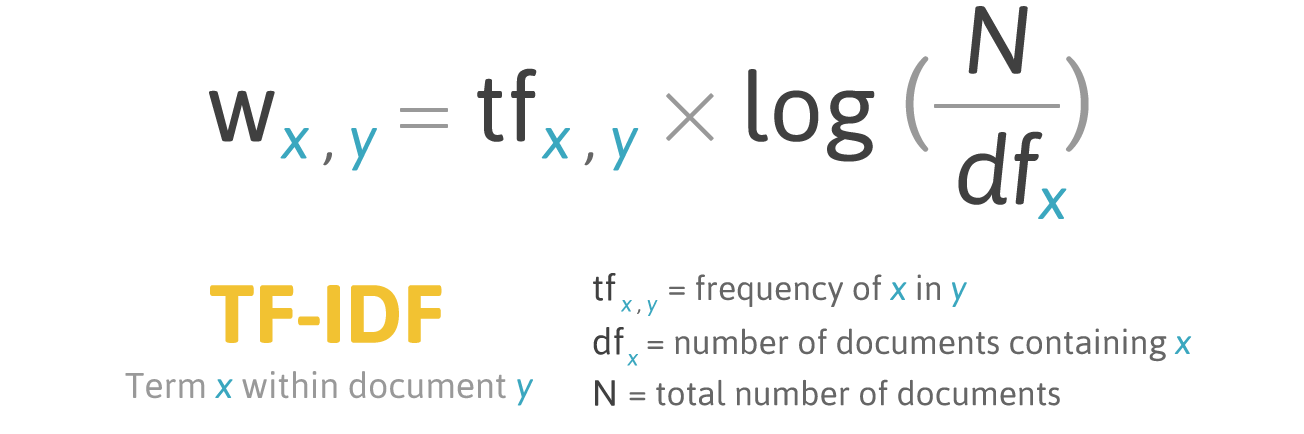

In [2]:
# importing required libraries
from collections import Counter  
from scipy.sparse import csr_matrix
import math
from operator import itemgetter, attrgetter
from sklearn.preprocessing import normalize
import numpy as np

<h3>Function to find the unique words in the corpus (excluding punctuations)</h3>

In [9]:
def fit(corpus): 
  unique_words_list = set()

  if isinstance(corpus, (list,)):  # corpus provided should be a list of sentences
    for row in corpus:
      for word in row.split(" "):
        if len(word) < 2:
          continue
        unique_words_list.add(word)

    unique_words_list = sorted(list(unique_words_list))  # sorting alphabetically 
    vocabulary = {j:i for i,j in enumerate(unique_words_list)}  # assigning variable for the unique words and their indices (alphabetically i.e. sorted order)

    return vocabulary
  else:
    print("Pass list of sentences")

vocabulary = fit(corpus)
# printing the unique set of words list
print(list(vocabulary.keys()))

['and', 'are', 'best', 'cat', 'dog', 'few', 'friends', 'is', 'mango', 'missing', 'of', 'on', 'pug', 'sat', 'scarcity', 'the', 'there', 'tree']


<h3>Function to find the denominator value of IDF(number of documents containing the term x)</h3>

In [11]:
# we will use this function while calculating idf in transform function
def idf_denominator(corpus, word):  
  count = 0
  for i in corpus:
    # if word present then count that document
    if word in i.split():
      count += 1
  return count

<h3>Function to find the IDF value of the unique words</h3>

In [12]:
def idf_func(corpus): 
  idf_values = []
  if isinstance(corpus, (list,)):  # corpus provided should be a list of sentences
    # get the list of unique words which is already calculated in fit() function
    vocabulary = fit(corpus=corpus)
    unique_words_list = list(vocabulary.keys())

    for word in unique_words_list:
      # idf formula (the constant “1” is added to the numerator and denominator of the idf as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions)
      idf = 1 + math.log((1+len(corpus))/float(1+idf_denominator(corpus,word)))
      idf_values.append(idf)
    return idf_values
    
  else:
    print("Pass list of sentences")

# printing idf values
print(idf_func(corpus))

[1.5108256237659907, 1.5108256237659907, 1.916290731874155, 1.2231435513142097, 1.5108256237659907, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.2231435513142097, 1.916290731874155, 1.5108256237659907]


<h3>Function to calculate TFI-IDF value of unique words</h3>

In [25]:
def transform(corpus,vocabulary):
  # empty lists for storing row index, column index and tfidf values respectively
  rows, columns, values = [], [], []
  
  if isinstance(corpus, (list,)):  # corpus provided should be a list of sentences
    
    for index, row in enumerate(corpus):
      # count the number of occurrences/frequency of each unique word in the documents
      word_frequency = dict(Counter(row.split()))

      for word, frequency in word_frequency.items():
        if len(word) < 2:
          continue

        # retreiving the dimension number/column number of the unique words
        # column index is -1, it means word(key) is not present
        column_index = vocabulary.get(word, -1)
        
        # if the word is present 
        if column_index != -1:  
          # appending the rows indices, column indices
          rows.append(index)  
          columns.append(column_index)

          # calculating and storing tfidf values
          tf = frequency/float(len(row))
          idf = 1 + math.log((1+len(corpus))/float(1+idf_denominator(corpus,word)))
          values.append((tf)*(idf))  

    # using l2 normalization # reference - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
    # csr matrix used to store keys and values in sparse format # reference -https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
    return normalize(csr_matrix((values, (rows,columns)), shape=(len(corpus), len(vocabulary))), norm='l2')
  
  else:
    print("Pass list of strings")


# printing first line of the corpus(tfidf values) in sparse matrix format
print('Sparse Matrix format - \n', transform(corpus,vocabulary)[0])

# converting sparse matrix output into dense matrix output and then printing
print('Dense Matrix format - \n', transform(corpus,vocabulary)[0].toarray())  

Sparse Matrix format - 
   (0, 3)	0.2957237796129484
  (0, 11)	0.4633084460595028
  (0, 13)	0.4633084460595028
  (0, 15)	0.5914475592258968
  (0, 17)	0.36527770049240543
Dense Matrix format - 
 [[0.         0.         0.         0.29572378 0.         0.
  0.         0.         0.         0.         0.         0.46330845
  0.         0.46330845 0.         0.59144756 0.         0.3652777 ]]


<h1>TFIDF SKLearn Implementation</h1>

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# fit and transform the data
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
skl_output = vectorizer.transform(corpus)

In [30]:
# sklearn feature names, they are sorted in alphabetic order by default.
print(vectorizer.get_feature_names())

['and', 'are', 'best', 'cat', 'dog', 'few', 'friends', 'is', 'mango', 'missing', 'of', 'on', 'pug', 'sat', 'scarcity', 'the', 'there', 'tree']


In [31]:
# printing the sklearn tfidf vectorizer idf values after applying the fit method

print(vectorizer.idf_)

[1.51082562 1.51082562 1.91629073 1.22314355 1.51082562 1.91629073
 1.91629073 1.91629073 1.91629073 1.91629073 1.91629073 1.91629073
 1.91629073 1.91629073 1.91629073 1.22314355 1.91629073 1.51082562]


In [32]:
# shape of sklearn tfidf vectorizer output after applying transform method.

skl_output.shape

(4, 18)

In [33]:
# Here the output is a sparse matrix

print(skl_output[0])

  (0, 17)	0.3652777004924055
  (0, 15)	0.5914475592258968
  (0, 13)	0.4633084460595028
  (0, 11)	0.4633084460595028
  (0, 3)	0.2957237796129484


In [34]:
# converting the sparse output matrix to dense matrix and printing it.
# Output is normalized using L2 normalization. Sklearn does this by default.

print(skl_output[0].toarray())

[[0.         0.         0.         0.29572378 0.         0.
  0.         0.         0.         0.         0.         0.46330845
  0.         0.46330845 0.         0.59144756 0.         0.3652777 ]]


<h1>Conclusion - </h1>
After comparing the TFIDF values of both the implementation, we can confirm that <u>we've calculated the TFIDF values of the input data corpus from scratch correctly.</u>